<a href="https://colab.research.google.com/github/jasmineA20/Avocodo/blob/main/Monte_Carlo_Simulations_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Physical Example: The Ising Model

The Ising Model is a classic example in statistical mechanics.  It is used to describe the behavior of systems that are made of a large number of ferromagnetic atoms, such as iron (although it has many applications beyond ferromagnets and even physics).  There are two  basic assumption of the model:

1.  If there are $N$ atoms, each atom  can in one of two states: one where the spin of the atom is pointing up and one where it is pointing down.  For example if there are four atoms lined up in a line (a 1D system), we could denote one configuration of that systems as:

 $\downarrow\uparrow \downarrow \downarrow$

 Where the atoms are pointing down, up, down, and down.  

2.  There is an energy preference for neighboring atoms to align with one another.  If two atoms next to each other point in the same direction, then the energy of that is denoted as $-J$ and if they are pointing in the same direction the energy is $+J$.  For example, for two atoms next to one another in 1D here are the possible states and their energies:

 $E=\begin{cases}
-J &  \text{for} \uparrow \uparrow \text{or} \downarrow \downarrow \\
+J &  \text{for} \downarrow \uparrow \text{or} \uparrow \downarrow \\
\end{cases}$

  For systems of more than two atoms, you find the total energy by adding up all of the pairwise energies between adjacent atoms.

**Activity** Consider an Ising system of three atoms in a line.  For example, here is one configuration:

$\downarrow\downarrow \downarrow $

List all of the configurations of the system, along with their corresponding energies:


Put your answer here:



A mathematically and coding convenient way to represent the above system is to denote an up arrow refer to the spin of each atom by the variable $\sigma$, and if the spin is up set $\sigma =+1$ and if the spin is down set $\sigma = -1$.  That is, for the system that looks like this:

$\uparrow \uparrow \downarrow \downarrow$

We can set the following values of $\sigma$

$\sigma_0 = 1$

$\sigma_1 = 1$

$\sigma_2 = -1$

$\sigma_3 = -1$

Where the subscripts indicate the atom indices.  With this notation, we can find the energy of two atoms next to one another as:

$ E_{ij} = -J \sigma_i \sigma_j$

Since if two atoms have the same spin this will results in a negative (favorable) energy, and if two have different spins this will give a positive (unfavorable) energy.

**Activity:**

Consider this configuration of spins:

$\uparrow \uparrow  \uparrow  \downarrow \downarrow \downarrow \downarrow \uparrow \uparrow \downarrow$

Write an array that corresponds to the spin values shown above, then write a routine that calculates the corresponding energy.  Set $J=2.0$ for this calculation.

In [ ]:
x = [ 1, 1, 1 ,0 ,0 ,0, 0, 1 ,1, 0]
J = 2 
A = []
for i in range(0,(len(x)-1)):
  E = -J*x[i]*x[i+1]
  A.append(E)
print('The system energy is:', sum(A))

The system energy is: -6


# Key results from statistical mechanics

## Boltzmann probabilities

One of the central results from statistical mechanics is that the probability that a system will be in a specific configuration is related to its energy by:

$ p \propto e^{-\frac{E}{k_BT}}$

For two configurations, $A$ and $B$, the relative probability of being in configuration $A$ vs $B$ is therefore:

$\frac{p_a}{p_b} = \frac{ e^{-\frac{E_A}{k_BT}}}{ e^{-\frac{E_B}{k_BT}}}=e^{-\frac{(E_A-E_B)}{k_BT}}$

If you have not encountered this before, take a moment to reflect on what this means.  In physics 1 you learned that systems adopt states of minimum energy. While this is true for macroscopic systems, when energy differences become on the order of $k_b T$ then the system become *probabilistic* and the system will transition between configurations with different probabilities.  Note that at 300 K, $k_b T \approx 4.11 \cdot 10^{-21} J$, so we're talking small energies here.  But at the molecular level, it turns out that many systems have energy differences between configurations on this level.

**Activity:** 

Consider two configurations of an Ising model:

A:
$\uparrow \uparrow  \uparrow  \downarrow \downarrow \downarrow \downarrow \uparrow \uparrow \downarrow$

and 

B:
$\uparrow \downarrow  \uparrow  \downarrow \downarrow \downarrow \downarrow \uparrow \uparrow \downarrow$

assuming that $k_B T = 1$ and $J = 1.0$, find the relative probabilities of the two states.  How much more likely are you to observe state A vs state B? What about for a temperature of  $k_B T = 10$?

In [ ]:
import numpy as np

In [ ]:
x1  = [ 1, 1, 1 ,0 ,0 ,0, 0, 1 ,1, 0]
x2  = [ 1, 0, 1 ,0 ,0 ,0, 0, 1 ,1, 0]
KbT = 10000 
J   = 1
EA = []
for i in range(0,(len(x1)-1)):
  Ea = -J*x1[i]*x1[i+1]
  EA.append(Ea)

EB = []
for i in range(0,(len(x2)-1)):
  Eb = -J*x2[i]*x2[i+1]
  EB.append(Eb) 


Rel = np.exp(-(sum(EA) - sum(EB))/KbT)
print(Rel)

1.0002000200013335


## Observables

Physics is based on observing things.  So how do we translate statistical mechanics into observables?  Since we have a series of configurations, and each has an associated probability ($p\left(E\right)$, the Boltzmann probability which is based on the energy $E$) we can take a weighted average of the observable over each configuration's probability.  If the observable is denoted by $A$, we express that as:

$\left<A\right> = \frac{\sum_i A_i p_i\left(E\right)}{\sum_i p_i\left(E\right)}=\frac{\sum_i A_i e^{-\frac{E_i}{k_BT}}}{\sum_i e^{-\frac{E_i}{k_BT}}} $

Where in the second equality we replaced the probability by the Boltzmann factor.  Calculating the above equation is one of the central goals of statistical mechanics and can be quite difficult.  But we can get an idea of how this works with the Ising model.  If we wanted to calculate the average energy of the system, our observable would be the energy of a configuration, that is $A=E_i$.  For our two spin Ising model, the math would look like this:
$\left<E\right> = \frac{\sum_i E_i e^{-\frac{E_i}{k_BT}}}{\sum_i e^{-\frac{E_i}{k_BT}}} $

Where the sum is over the four possible configurations of the system.  In code, we could calculate this average by iterating over each possible configuration of the spin, calculating the energy for that configuration, and then using those energies in the sums above.  Note that the denominator is typically denoted by the variable $Z$ (this is the "partition function" of the system) so its advisable to use that variable name in your program.  See the code below, and make sure you understand how it works (discuss with your breakout room and ask for help if you don't).

In [ ]:
import numpy as np

J = 1.0
kT = 1.0

#function for calculating the energy of a spin array
def energy_function(spins):
  energy = 0.0
  for i in range(len(spins)-1):
    energy += -1.0 * J * spins[i]*spins[i+1]
  return energy

E_aver = 0.0 #numerator in the above equation
Z = 0.0 #denominator in the above equation, which is usually represented by a Z

for i in ([-1,1]): #loop over each possible value of the first spin
  for j in ([-1,1]): #loop over each possible value of the second spin
    spins = ([i,j]) #setup our array of spins for this configuration
    E = energy_function(spins) #energy for that configuration
    E_aver  += E * np.exp(-1.0 * E/kT) #add to the sum in the numerator
    Z += np.exp(-1.0 * E/kT) #add to the sum in the denominator
    print("Configuration [%3i,%3i] has energy E= %6.4f"%(i,j,E))

print("The average energy of the system is <E> = %6.4f"%(E_aver/Z))

Configuration [ -1, -1] has energy E= -1.0000
Configuration [ -1,  1] has energy E= 1.0000
Configuration [  1, -1] has energy E= 1.0000
Configuration [  1,  1] has energy E= -1.0000
The average energy of the system is <E> = -0.7616


Note that the average energy is NOT the minimum energy of the system! Try changing the temperature above.  When you get very high temperatures, what is the average energy?  What about for very low temperatures?

Another physical observable we'll be interested in for the Ising model is the net magnetization, which is the average number of spins pointing in the same direction.  This tells us the tendency for the system to have all spins pointing in the same direction, and hence for our system to act like a magnet.

For a configuration, we can calculate this by the absolute value of the average of the spins:

$M = \frac{\left.| \sum_i \sigma_i\right.|}{N}$

To calculate the average net magnetization of our system we calculated the weighted sum over all the possible configurations:

$\left<M\right> = \frac{\sum_i M_i e^{-\frac{E_i}{k_BT}}}{\sum_i e^{-\frac{E_i}{k_BT}}} $

To calculate this in code, we need to compute $M_i$ for each of our configurations.  We can do that by iterating over each possible configuration as above, but this time calculating $M$ for each of those configurations and adjusting our code to calculate $\left<M\right>$ instead of $\left<E\right>$. For example, see the code below:


In [ ]:
import numpy as np

J = 1.0
kT = 1.0

#function for calculating the energy of a spin array
def energy_function(spins):
  energy = 0.0
  for i in range(len(spins)-1):
    energy += -1.0 * J * spins[i]*spins[i+1]
  return energy

M_aver = 0.0 #numerator in the above equation
Z = 0.0 #denominator in the above equation, which is usually represented by a Z

for i in ([-1,1]): #loop over each possible value of the first spin
  for j in ([-1,1]): #loop over each possible value of the second spin
    spins = ([i,j]) #setup the array of spins
    E = energy_function(spins) #energy for that configuration
    M = np.abs(np.sum(spins))/2
    M_aver += M * np.exp(-1.0 * E / kT)
    Z += np.exp(-1.0 * E/kT)
    print("Configuration [%3i,%3i] has a net magnetization of M= %4.2f"%(i,j,M))

print("The average net magnetization of the system is <M> = %6.4f"%(M_aver/Z))

Configuration [ -1, -1] has a net magnetization of M= 1.00
Configuration [ -1,  1] has a net magnetization of M= 0.00
Configuration [  1, -1] has a net magnetization of M= 0.00
Configuration [  1,  1] has a net magnetization of M= 1.00
The average net magnetization of the system is <M> = 0.8808


**Activity** Consider an Ising model made of four spins. Modify the code above to calculate the net magnetization for the system. Try the code for temperatures of $kT= 0.01, 0.1, 1.0, 10.0, 100.0$.  How does the net magnetization change with temperature?

In [ ]:
import numpy as np

J = 1.0
kT = 1.0

#function for calculating the energy of a spin array
def energy_function(spins):
  energy = 0.0
  for i in range(len(spins)-1):
    energy += -1.0 * J * spins[i]*spins[i+1]
  return energy

M_aver = 0.0 #numerator in the above equation
Z = 0.0 #denominator in the above equation, which is usually represented by a Z

for i in ([-1,1]): #loop over each possible value of the first spin
  for j in ([-1,1]): #loop over each possible value of the second spin
    for k in ([-1,1]): #loop over each possible value of the third spin
      for l in ([-1,1]): #loop over each possible value of the fourth spin
        spins = ([i,j,k,l]) #setup the array of spins
        E = energy_function(spins) #energy for that configuration
        M = np.abs(np.sum(spins))/4
        M_aver += M * np.exp(-1.0 * E / kT)
        Z += np.exp(-1.0 * E/kT)
        print("Configuration [%3i,%3i,%3i,%3i] has a net magnetization of M= %4.2f"%(i,j,k,l,M))

print("The average net magnetization of the system is <M> = %6.4f"%(M_aver/Z))

Configuration [ -1, -1, -1, -1] has a net magnetization of M= 1.00
Configuration [ -1, -1, -1,  1] has a net magnetization of M= 0.50
Configuration [ -1, -1,  1, -1] has a net magnetization of M= 0.50
Configuration [ -1, -1,  1,  1] has a net magnetization of M= 0.00
Configuration [ -1,  1, -1, -1] has a net magnetization of M= 0.50
Configuration [ -1,  1, -1,  1] has a net magnetization of M= 0.00
Configuration [ -1,  1,  1, -1] has a net magnetization of M= 0.00
Configuration [ -1,  1,  1,  1] has a net magnetization of M= 0.50
Configuration [  1, -1, -1, -1] has a net magnetization of M= 0.50
Configuration [  1, -1, -1,  1] has a net magnetization of M= 0.00
Configuration [  1, -1,  1, -1] has a net magnetization of M= 0.00
Configuration [  1, -1,  1,  1] has a net magnetization of M= 0.50
Configuration [  1,  1, -1, -1] has a net magnetization of M= 0.00
Configuration [  1,  1, -1,  1] has a net magnetization of M= 0.50
Configuration [  1,  1,  1, -1] has a net magnetization of M= 

#Monte Carlo Simulations

The above algorithm for calculating the properties of an Ising model will work, but it quickly becomes impossible to solve.  For example, if you had a system of 100 spins, then there would exist $2^{100}=10^{30}$ configurations.  Even if your computer can do a billion operations per second, it would still take on the order of $10^{13}$  years to iterate through all of the configurations.  This is a thousand times longer than the age of the universe!!!  Clearly, this is not the way.

The solution is not to sample all of the configurations, but to sample them at random.   Naively, if you wanted to calculate the average net magnetization by: 

$\left<M\right> = \frac{\sum_i M_i e^{-\frac{E_i}{k_BT}}}{\sum_i e^{-\frac{E_i}{k_BT}}} $

you might try to generate a large number of random spin arrays and then to use them in the above formula (similar to what we did with Monte Carlo integration).  The code below does exactly this, and it prints out the average magnetization, along with creating plots of the energy of each random configuration and the probability of that configuration based on the Boltzmann factor.

**Activity:** Run the code below with $N=50$ spins and for $10000$ iterations.  Answer the following questions:

1.  Run your code multiple times.  How reproducible are the results for the net magnetization?     Note that at low temperatures (such as $kT = 0.5$) you should get a high magnetization as all the dipoles will want to point in the same direction.
2.  Examine the plots of the energies probabilities for each random conformation.  How low of an energy does your system explore? For the $10000$ random conformations, about how many of them have an appreciable probability (such as greater than 10%)?  Note that these conformations will dominate the weighted average you are calculating for the net magnetization (or any other observable).  
3.  If you have time, try running the code for $N=10$  and $N=100$ spins.  How does the number of spins impact the reproducibility of your results? How does it impact the number of random conformations that have probabilities >10%?


The average net magnetization of the system is <M> = 0.1650


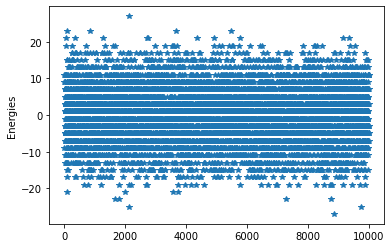

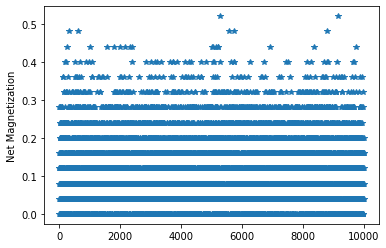

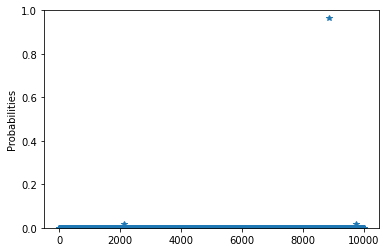

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Input values for the simulation
N = 50
iters = 10000
J = 1.0
kT = 0.5

#function for calculating the energy of a spin array
def energy_function(spins):
  energy = 0.0
  for i in range(len(spins)-1):
    energy += -1.0 * J * spins[i]*spins[i+1]
  return energy

#setup the arrays for storing the energies and M, and variables for the average M and Z
energies = np.zeros(iters)
M = np.zeros(iters)
M_aver = 0.0 
Z = 0.0

for i in range(iters): #perform iterations
  spins = 2*np.random.randint(2,size=N)-1 #setup an array of random spines
  E = energy_function(spins) #energy for that configuration
  M[i] = np.abs(np.sum(spins))/N #M for that configuration
  M_aver += M[i] * np.exp(-1.0 * E / kT) #weighted M for that configuration
  energies[i]=E #store the energy for that configuration
  Z += np.exp(-1.0 * E/kT) #add to Z for that configuration

#Plot the results
print("The average net magnetization of the system is <M> = %6.4f"%(M_aver/Z))
plt.plot(energies,'*')
plt.ylabel("Energies")
plt.show()

plt.plot(M,'*')
plt.ylabel("Net Magnetization")
plt.show()

probs = np.exp(-1.0*(energies-np.min(energies))/kT) #calculate unnormalized probabilities
probs /= np.sum(probs) #normalize probabilties
plt.plot(probs,'*')
plt.ylabel("Probabilities")
plt.ylim(0,1)
plt.show()

The naive random sampling doesn't work that well.  Why? Because even though we're sampling at random, many of the configurations we sample have a high energy, and thus a low probability of being observed because of the Boltzmann distribution.  So there's little need to include them in our calculations.  To make matters worse, we miss many of the low energy, high probability configurations (which will become clear below).  The solution is to come up with a way to preferentially sample high probability/low energy configurations.   This idea is part of the broader field of *importance sampling*, in which we preferentially sample the important parts of our distribution. 

Here, the algorithm of Markov Chain Monte Carlo simulations is described.  To preferentially sample low energy/high probability configurations we:

1.  Choose a random starting configuration.  Here, that is a random string of spins.

2.  Calculate the energy of the system.  We'll call that $E_i$.

3.  Try randomly changing our system.  Here, that corresponds to picking a spin at random and flipping it (that is, we multiply a random spin by -1).

4.  Calculate the new energy of the system after this change. We'll call that $E_j$.

5.  Use the difference in energies between $E_i$ and $E_j $ to determine if we'll keep the random change we made.  To do that there are two cases:

  A.  If $E_j<E_i$ then the random move we made reduced the system's energy and we keep the random move.

  B.  If $E_j >E_i$  then the random move we made increases the energy of the system.  We will keep the random move we made with the probability of:

   $ p = e^{-\frac{E_j-E_i}{k_BT}}$

   (which is the ratio of the Boltzmann factors of the two configurations).  Since this ratio is by definition between 0 and 1, we can code this acceptance criteria with the following if statement:

   ```if np.random.random() < np.exp(-(Ej-Ei)/kT):  accept change```

    This is the "Metropolis Criteria."  Its goal is to keep each of the sampled configurations in the correct probability as determined by statistical mechanics. 

6.  Repeat steps 2-5 for however many iterations it takes to converge your results (or as long as you can afford).

One nice aspect of this method is that because you are sampling configurations with the correct (Boltzmann) probability, any observable you want to calculate is simply the average of what you observe over the calculation (you don't need to multiply it by a Boltzmann factor). Note that you may need to discard an initial portion of your simulation as it comes to equilibrium when you do this (people often refer to this as letting the simulation "burn in"). 

**Activity:** To see how this work, the code below implements a Markov Chain Monte Carlo simulation of the 1D Ising model we've been dealing with.  First, examine how it functions.  Can you see how the above algorithm is implemented in this code?  Then, run it with the same set of parameters you ran with the naive approach. Answer the following:

1.  For the same set of parameters, how do the energies and spins of the sampled states compare?

2.  Compare the relative probabilities sampled in this method and the naive approach.  Which method has more even sampling?  That is, in which method do you see more configurations sampled that have relatively high probabilities?

3.  Try running the code with various values of $N$, $kT$, and $iters$.  How does the number of iterations you need to compute a reliable answer depend on these parameters? 

The average net magnetization of the system is <M> = 0.5849


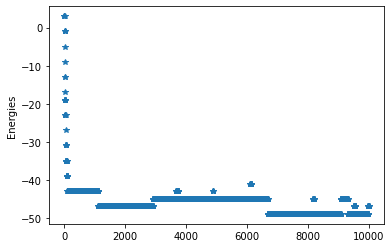

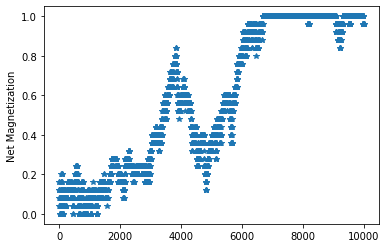

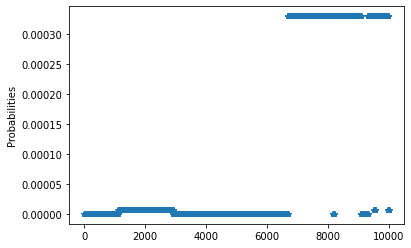

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Input values for the simulation
N = 50
iters = 10000
J = 1.0
kT = 0.5


#function for calculating the energy of a spin array
def energy_function(spins):
  energy = 0.0
  for i in range(len(spins)-1):
    energy += -1.0 * J * spins[i]*spins[i+1]
  return energy

#setup the arrays for storing the energies and magnetization, and an initial random spin array
energies = np.zeros(iters)
M = np.zeros(iters)
spins = 2*np.random.randint(2,size=N)-1

for i in range(iters): #Perform iterations
  E_orig = energy_function(spins) #energy for that configuration
  flipper = np.random.randint(N) #pick a random spin to flip
  spins[flipper] *= -1 #flip that spin
  E_flipped = energy_function(spins) #find the energy of the system with the new spin state
  if E_flipped < E_orig or np.random.random() < np.exp(-1.0*(E_flipped-E_orig)/kT): #Check the metropolis criteria
    #Accept the move if criteria are met
    E = E_flipped
  else:
    #Undo the move if criteria are not met
    E = E_orig
    spins[flipper] *= -1

  M[i] = np.abs(np.sum(spins))/N #M for that configuration
  energies[i]=E #E for that configuration

#Plot the results
M_aver = np.mean(M)
print("The average net magnetization of the system is <M> = %6.4f"%M_aver)
plt.plot(energies,'*')
plt.ylabel("Energies")
plt.show()

plt.plot(M,'*')
plt.ylabel("Net Magnetization")
plt.show()

probs = np.exp(-1.0*(energies-np.min(energies))/kT) #calculate unnormalized probabilities
probs /= np.sum(probs) #normalize probabilties
plt.plot(probs,'*')
plt.ylabel("Probabilities")
plt.show()

If you complete all of this, think about how we would modify this code to perform Ising model calculations in 2D.  We'll do that next class!